# 출처 : [Kaggle 2020] Visualization & Analysis
### https://www.kaggle.com/subinium/kaggle-2020-visualization-analysis/notebook
###### 복습

## Visualization and Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")
plt.style.use("seaborn-whitegrid")

In [11]:
raw = pd.read_csv(r"./dataset/kaggle_survey_2020_responses.csv", low_memory=False)
raw.shape

(20037, 355)

In [13]:
raw.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#질문 및 답변 데이터셋 분리
question = raw.iloc[0]
answer = raw.drop([0])

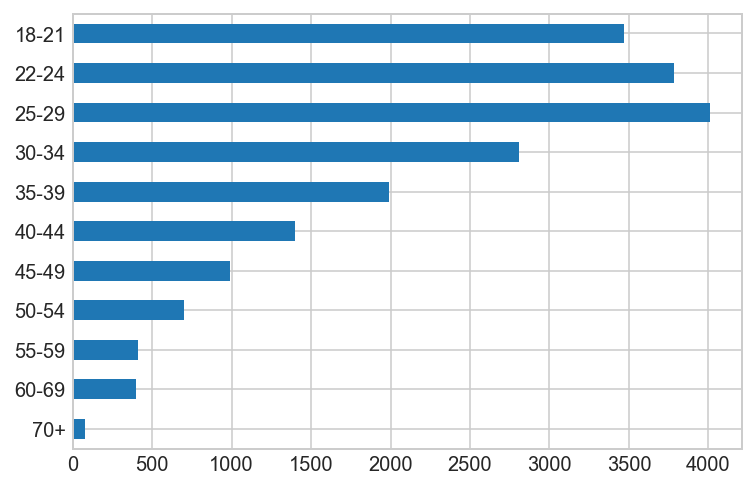

In [53]:
answer["Q1"].value_counts().sort_index(ascending = False).plot.barh()


Text(0.5, 1.0, 'What is your age (# years)?')

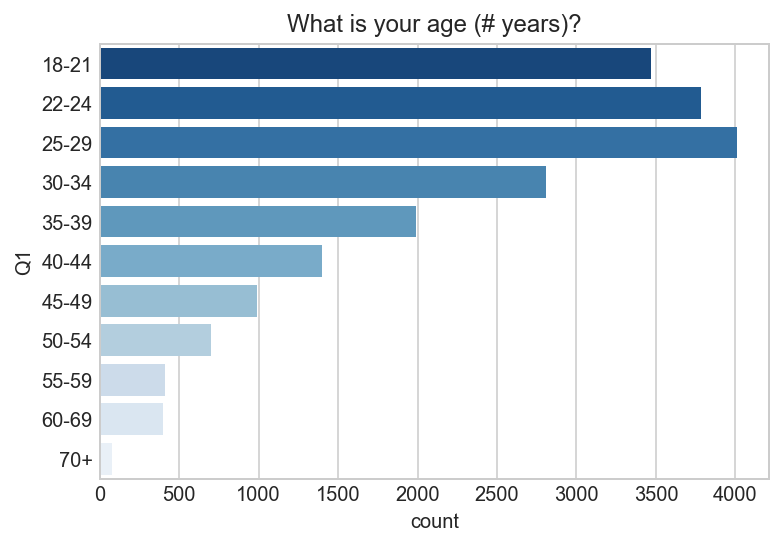

In [42]:
question_no = "Q1"
sns.countplot(data = answer.sort_values(question_no),
             y = question_no, palette = "Blues_r"
             ).set_title(question[question_no])

Text(0.5, 1.0, 'What is your gender? - Selected Choice')

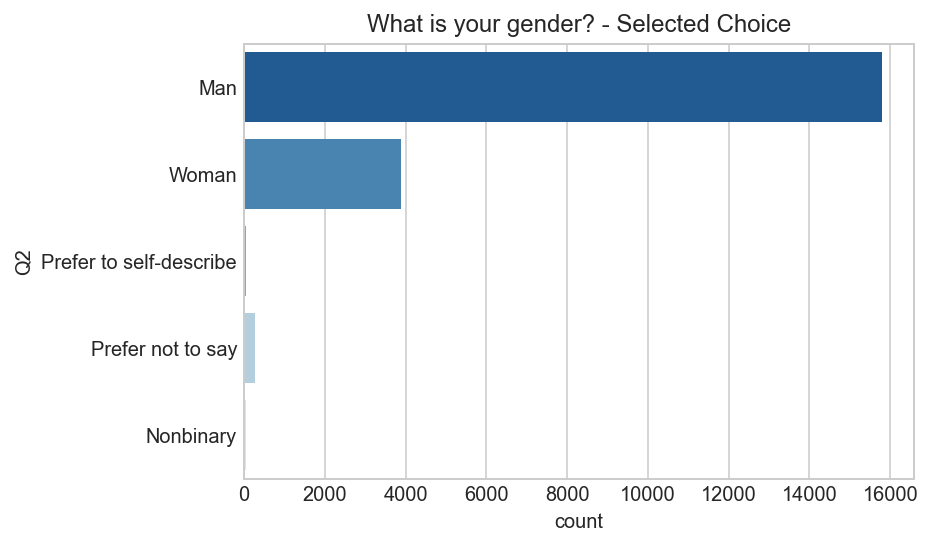

In [69]:
question_no = "Q2"
sns.countplot(data = answer,
             y = question_no, palette = "Blues_r"
             ).set_title(question[question_no])

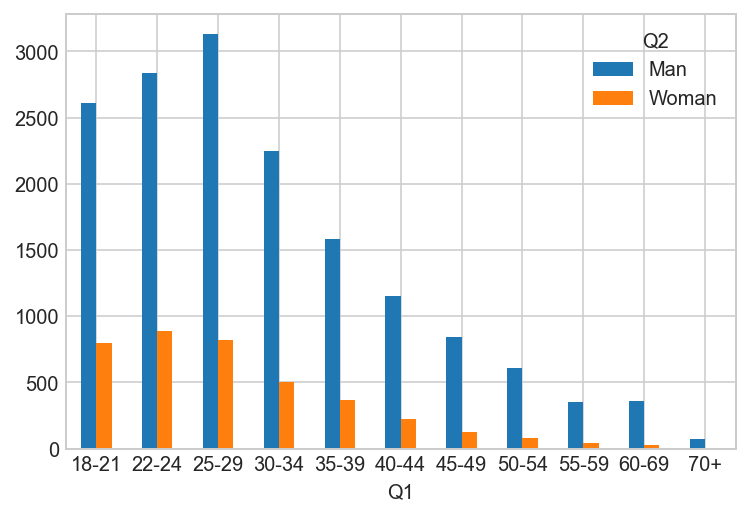

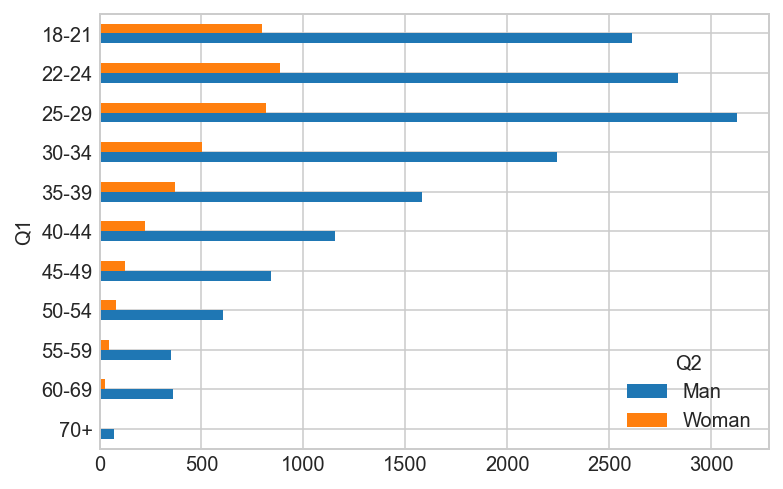

In [79]:
q1q2 = pd.crosstab(answer["Q1"],answer["Q2"])
q1q2[["Man","Woman"]].plot.bar(rot = 0)
q1q2[["Man","Woman"]].sort_index(ascending = False).plot.barh()

Text(0.5, 1.0, 'Age & Gender')

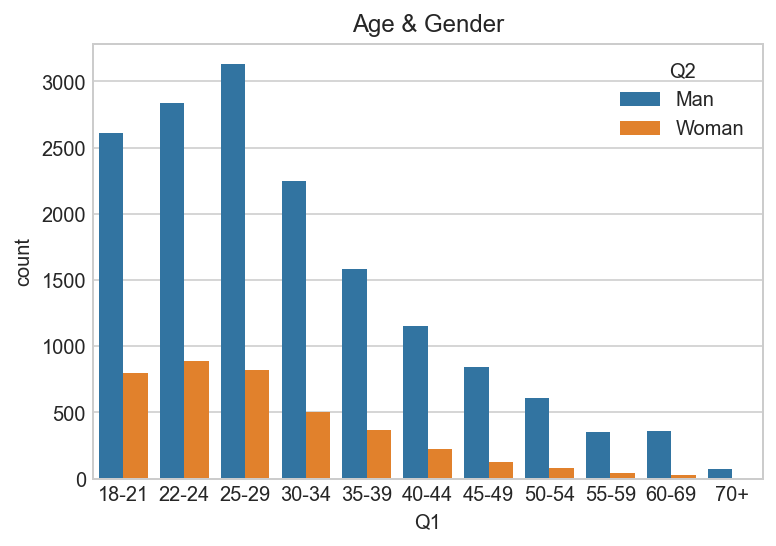

In [89]:
sns.countplot(data = answer[answer["Q2"].isin(["Man","Woman"])].sort_values("Q1"),
            x = "Q1", hue = "Q2").set_title("Age & Gender")

In [103]:
q1_cols = answer["Q1"].value_counts().sort_index().index.tolist()
q1_cols

['18-21',
 '22-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-69',
 '70+']

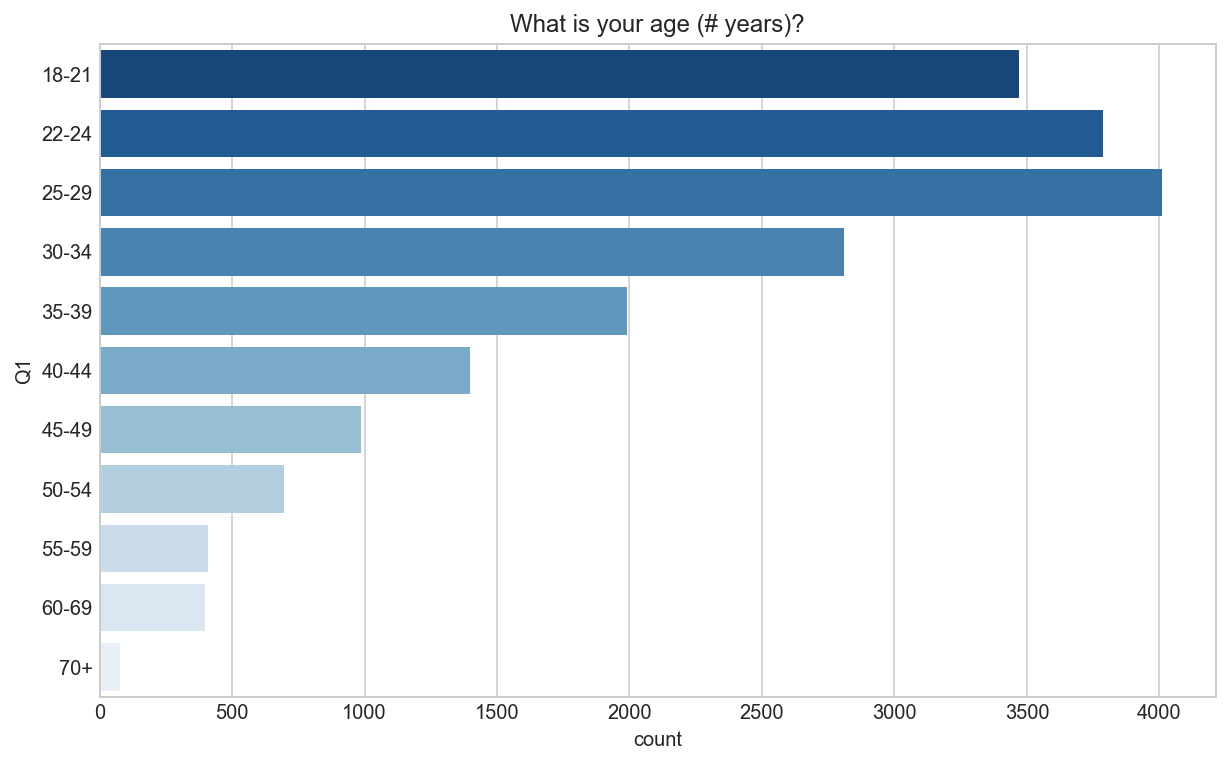

In [252]:
def show_countplot_by_qno(qno,fsize =(10,6),order = None):
    
    if not order:
        order = answer[qno].value_counts().index
    
    plt.figure(figsize = fsize)
    sns.countplot(data = answer, y = qno,
                  order = order,
                  palette = "Blues_r").set_title(question[qno])

show_countplot_by_qno("Q1",order = q1_cols) 

Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply)')

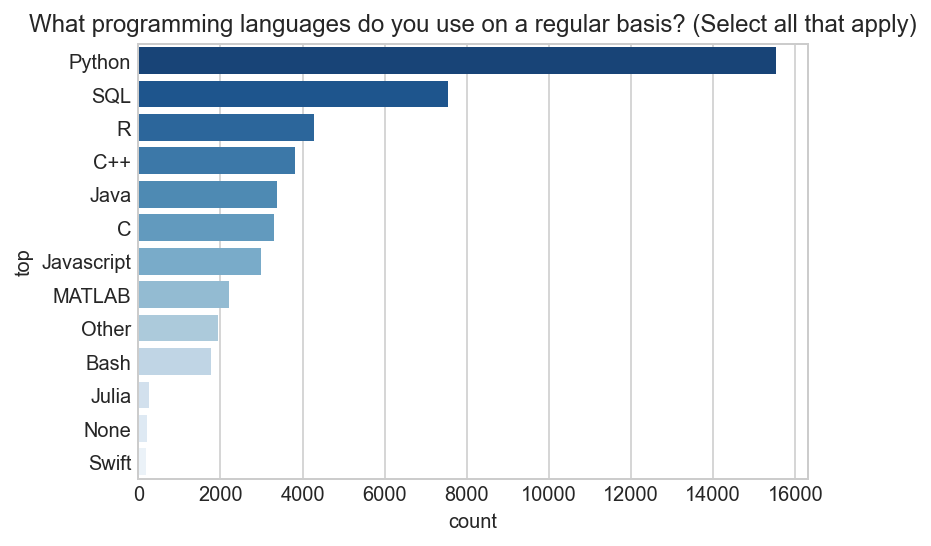

In [144]:
ans_q7 = answer.filter(regex = "^Q7")
ans_q7_desc = ans_q7.describe()
ans_q7_count = ans_q7_desc.loc[["top","count"]]
ans_q7_count = ans_q7_count.T.set_index("top")
ans_q7_count = ans_q7_count.sort_values("count", ascending = False)
ans_q7_count

q7_title = question.filter(regex = "^Q7")[0].split("-")[0].strip()

sns.barplot(data = ans_q7_count,
            x = "count", y = ans_q7_count.index,
            palette = "Blues_r").set_title(q7_title)

In [160]:
q7_cols = answer.filter(regex = "^Q7").describe().loc["top"].tolist()

q2q7 = answer.filter(regex = "^Q7|Q2$")
q2q7_count = q2q7.groupby("Q2").count()
q2q7_count.columns = q7_cols
q2q7_count

,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
Q2,,,,,,,,,,,,,
Man,12530,3299,5940,2552,3063,2641,2487,238,171,1561,1679,149,1634
Nonbinary,41,14,20,8,10,1,6,1,2,10,7,0,7
Prefer not to say,182,48,97,36,43,42,41,5,4,31,28,6,31
Prefer to self-describe,41,8,18,12,13,9,12,2,1,10,6,0,7
Woman,2736,908,1460,707,698,674,449,16,20,164,497,51,266


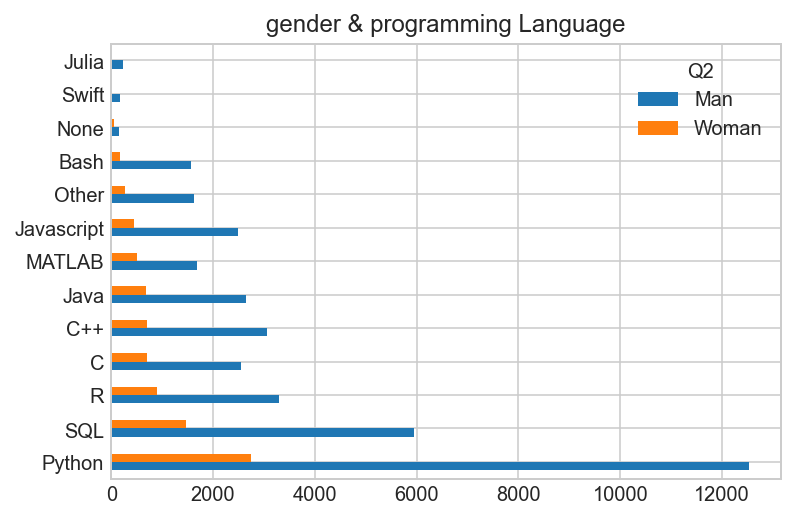

In [169]:
g = q2q7_count.loc[["Man","Woman"]].T.sort_values("Woman", ascending = False).plot.barh(title = "gender & programming Language")

In [197]:
#try - except
def get_question_title_function(qno):
    try:
        question[qno]
        return question[qno]
    except:
        title = question.filter(regex = qno)[0].split("-")[0].strip()
        return title

#if-else
def get_question_title_function(qno):
    if qno in question:
        return question[qno]
    else:
        title = question.filter(regex = qno)[0].split("-")[0].strip()
        return title
get_question_title_function("Q9")

"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply)"

In [232]:
def get_multiple_choice_answer_by_qno(qno):
    answer_selected = answer.filter(regex = qno)
    answer_desc = answer_selected.describe()
    answer_count = answer_desc.loc[["top","count"]].T.set_index("top")
    return answer_count
get_multiple_choice_answer_by_qno("Q8")

,count
top,
Python,17821


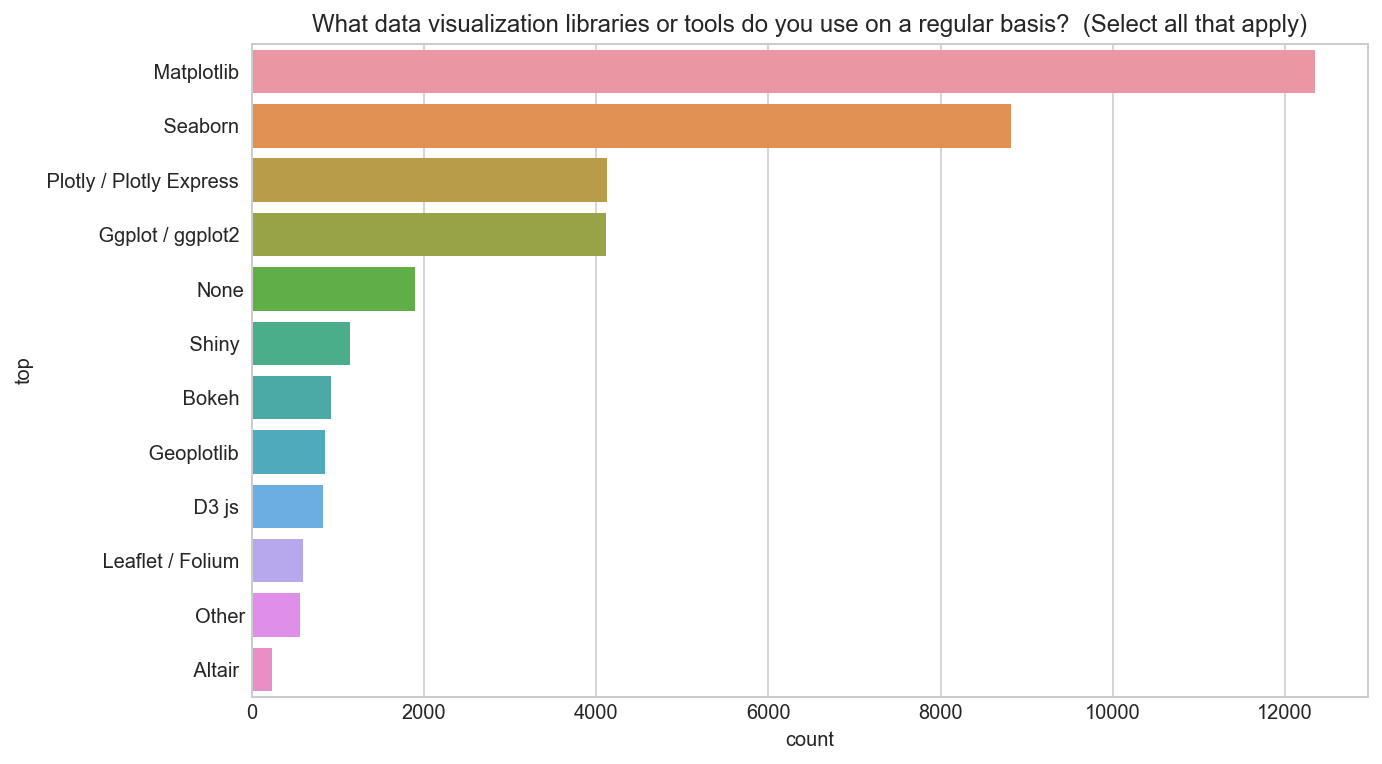

In [262]:
def show_multiple_choice_bar_plot_by_qno(qno,fsize = (10,6),order = None):
    multiple_choise_answer = get_multiple_choice_answer_by_qno(qno)
    
    if not order:
        order = multiple_choise_answer.sort_values("count", ascending = False).index.tolist()
    
    plt.figure(figsize = fsize)
    sns.barplot(data = multiple_choise_answer, x = "count",
                y = multiple_choise_answer.index,
                order = order).set_title(get_question_title_function(qno))
show_multiple_choice_bar_plot_by_qno("Q14")

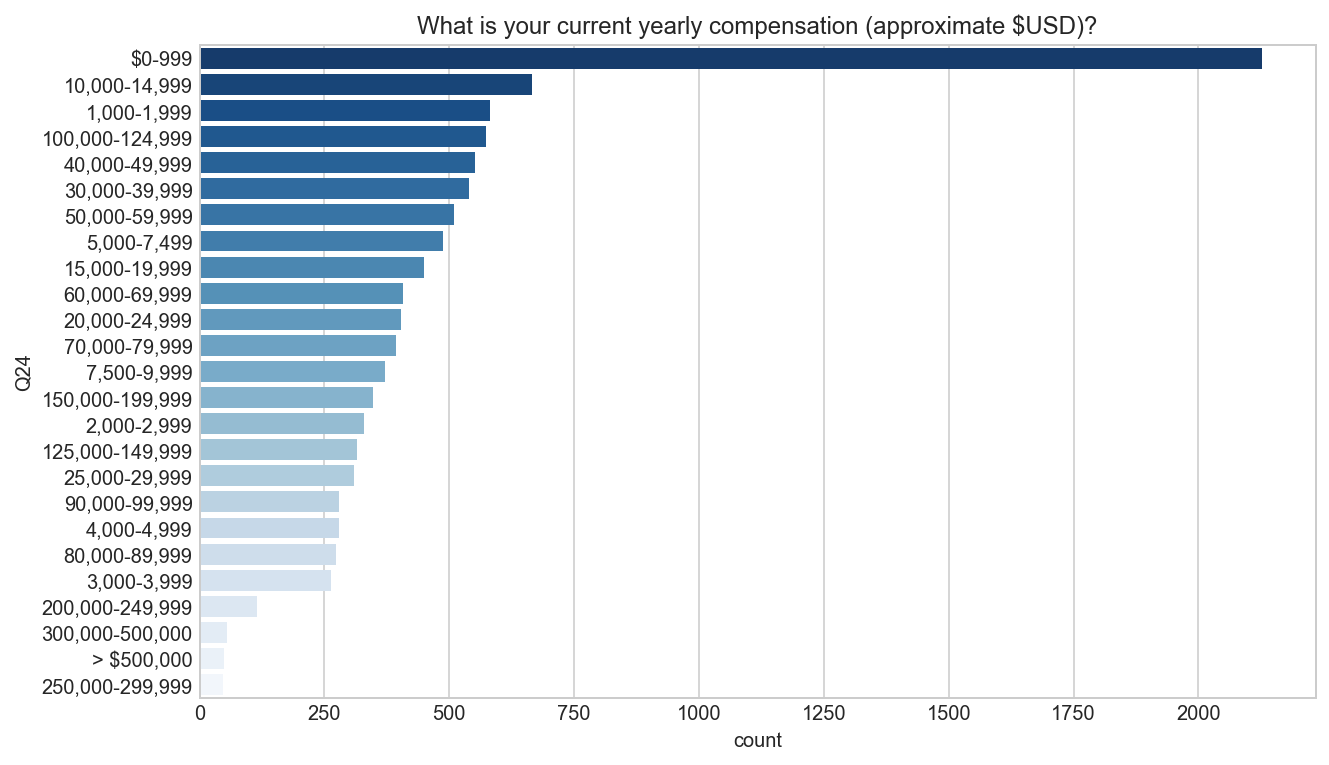

In [274]:
def show_plot_by_qno(qno, fsize=(10,6), order=None):
    if qno in question:
        show_countplot_by_qno(qno,fsize,order)
    else:
        show_multiple_choice_bar_plot_by_qno(qno,fsize,order)
show_plot_by_qno("Q24")

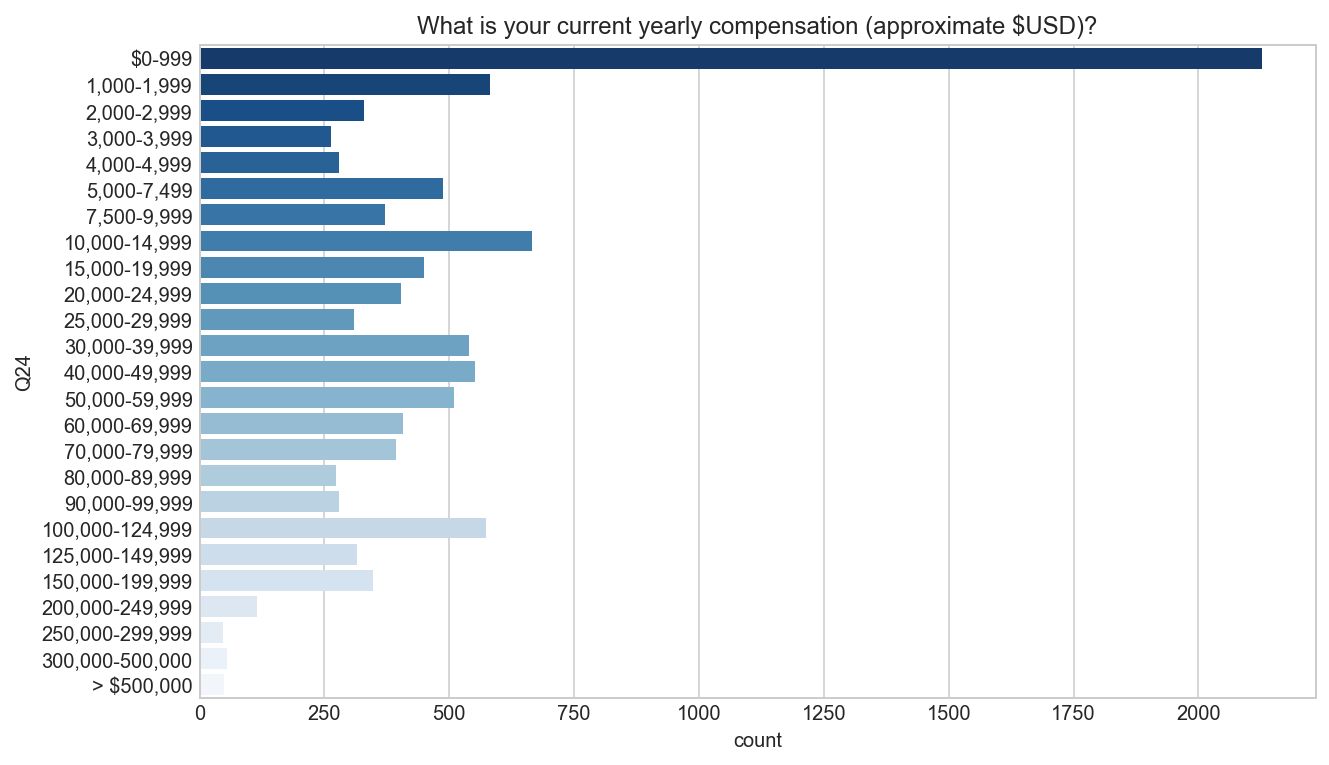

In [320]:
q24 = answer["Q24"].value_counts().reset_index()
q24.columns = ["range","value"]
q24["min"] = q24["range"].str.split("-",expand = True)[0]
q24["max"] = q24["range"].str.split("-",expand = True)[1]
q24["min"] = q24["min"].str.replace(",|\$|>","").astype(int)
q24_cols = q24.sort_values("min").range.tolist()

show_plot_by_qno("Q24", order=q24_cols)